# Data pre-processing

In [155]:
# Here to split raw data into two sets, training set & testing set (Holdout 1/3)

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
# Read in csv file of raw traffic record
rec_df_raw = pd.read_csv("./data/tmdb_5000_features.csv")

In [171]:
# Delete unwanted features, features: language cast_num cast_0 crew_num director genre_0 campany_0 country
rec_df =  rec_df_raw[['language', 'cast_num', 'cast_0', 'crew_num', 'director', 'genre_0', 'company_0', 'country']]
rec_df.head()

,language,cast_num,cast_0,crew_num,director,genre_0,company_0,country
0,en,83,Sam Worthington,153,James Cameron,Action,Ingenious Film Partners,US
1,en,34,Johnny Depp,32,Gore Verbinski,Adventure,Walt Disney Pictures,US
2,en,83,Daniel Craig,155,Sam Mendes,Action,Columbia Pictures,GB
3,en,158,Christian Bale,217,Christopher Nolan,Action,Legendary Pictures,US
4,en,27,Taylor Kitsch,132,Andrew Stanton,Action,Walt Disney Pictures,US


# Data Visualization

In [173]:
# Visualization for attribute crew_num
crew_num = rec_df[['crew_num']]
crew_ary = np.array(crew_num)
crew_num.head()

,crew_num
0,153
1,32
2,155
3,217
4,132


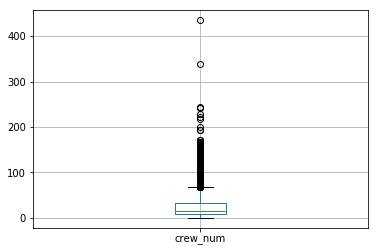

In [162]:
boxplot = crew_num.boxplot(column=['crew_num'])

In [163]:
# 25 percentile from 0 to 8 -> 0
np.percentile(crew_ary, 25)

8.0

In [164]:
# 50 percentile from 9 to 16 -> 1
np.median(crew_ary)

16.0

In [165]:
# 75 percentile from 17 to 32 -> 2
np.percentile(crew_ary, 75)

32.0

In [166]:
# 100 percentile from 32 to 435 -> 3
np.percentile(crew_ary, 100)

435.0

In [167]:
for index, row in crew_num.iterrows():
    num = row["crew_num"]
    if 0<=num and num<=8:
        row['crew_num'] = 0
    elif 8<num and num<=16:
        row['crew_num'] = 1
    elif 17<num and num<=32:
        row['crew_num'] = 2
    else:
        row['crew_num'] = 3

rec_df.insert(8, 'new_crew_num', crew_num['crew_num'])

In [170]:
rec_df.head()

,language,cast_num,cast_0,crew_num,director,genre_0,company_0,country,new_crew_num
0,en,83,Sam Worthington,153,James Cameron,Action,Ingenious Film Partners,US,3
1,en,34,Johnny Depp,32,Gore Verbinski,Adventure,Walt Disney Pictures,US,2
2,en,83,Daniel Craig,155,Sam Mendes,Action,Columbia Pictures,GB,3
3,en,158,Christian Bale,217,Christopher Nolan,Action,Legendary Pictures,US,3
4,en,27,Taylor Kitsch,132,Andrew Stanton,Action,Walt Disney Pictures,US,3


In [47]:
# Raw 4790 movies, training 3194, testing 1596
train_df = rec_df.head(3194)
test_df = rec_df.head(1596)